In [1]:
from tools import *
from plots import *
from RegularGrid import RegularGrid

In [2]:
# reload automaticaly external modules
%load_ext autoreload
%autoreload 2

### **Python file**

In [3]:
import random
category_name = f'formatage/{random.randint(0, 999):0>3}'
category_name

'formatage/568'

### **Rows**, **Columns** and more

In [4]:
degree = 3
rows = 4
cols = 1

In [5]:
folder_name =f'double_hline'
steps = 10
deployment = 'min'
# deployment= 'linear'

In [6]:
folder_name , path_name = \
    create_dir_hierarchy(category_name,
                         degree,
                         rows,
                         cols,
                         deployment,
                         folder_name)

In [7]:
grid = RegularGrid(degree, rows, cols)

### **Deployed** and **Undeployed**

In [8]:
undeployed_cells = [4]
deployed_cells  = [grid.numUmbrellas-2, 0]

- grid.border()
- grid.center()
- grid.vline(line_idx)
- grid.hline(line_idx)
- grid.cross(arm_length)

---

In [9]:
# extremities
active_cells    = deployed_cells + undeployed_cells
target_percents = [100]*len(deployed_cells) + [0]*len(undeployed_cells) # 0:undeployed | 100:deployed

In [10]:
# linear
# active_cells    = grid.hline(1) + grid.hline(4)
# target_percents = linear_height_ls(grid.hline(1)) + linear_height_ls(grid.hline(4))

In [11]:
for c,p in zip(active_cells, target_percents):
    print(f'cell:target percent - {c:0>2}:{p: >3.0f}%')

cell:target percent - 06:100%
cell:target percent - 00:100%
cell:target percent - 04:  0%


In [12]:
# write meta-data
write_metadata(path_name, degree, rows, cols, deployment, steps, active_cells, target_percents)
# write path
with open("./paths.txt", "a") as f:
    f.write(path_name+'\n')

In [13]:
grid.generate_mesh(folder_name)

PLATE CHARACTERISTIQUES:
	plate thickness   : 0.023358
	plate edge length : 0.233578


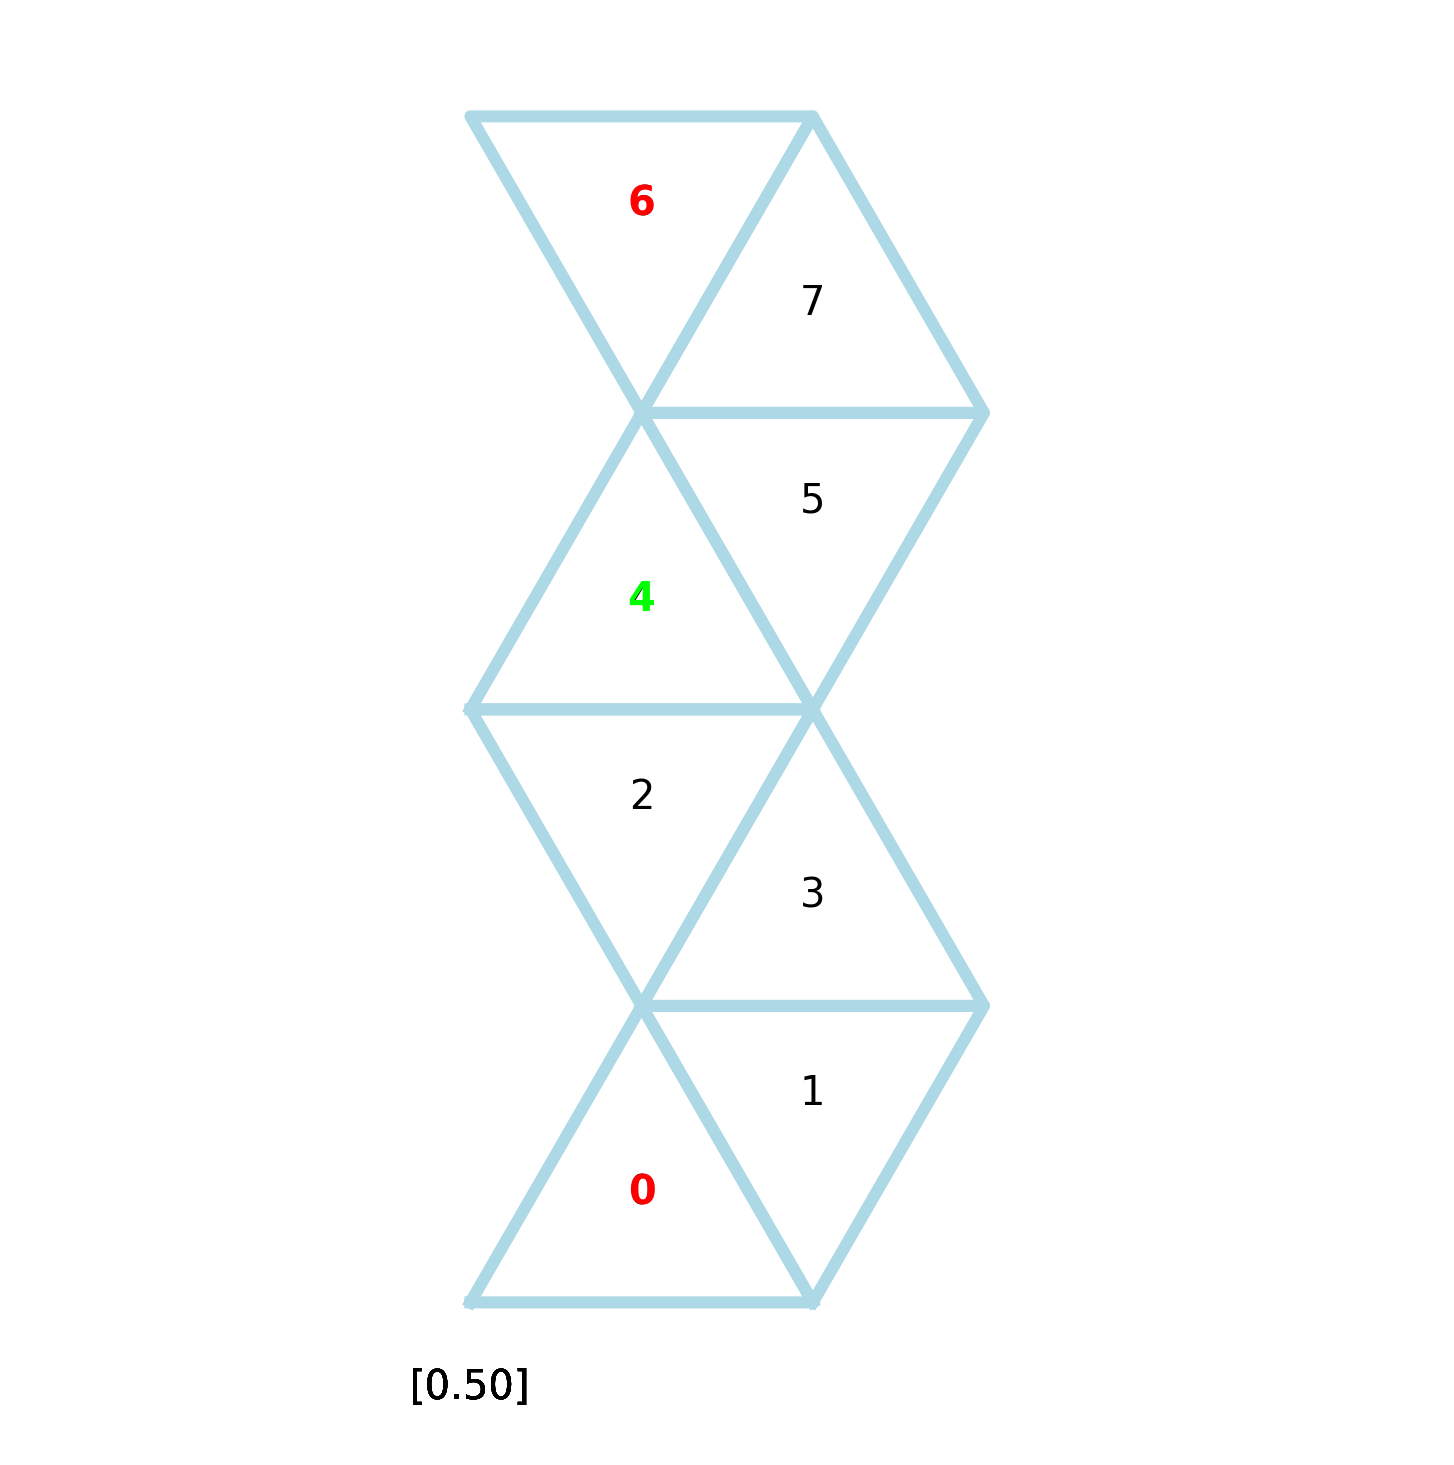

In [14]:
plot2D(grid.input_data, grid.curr_um, show_height=False, active_cells=active_cells, target_percents=target_percents, file_name = path_name+'/undeployed.png')

### **Step Deployments**

In [15]:
stresses_per_steps, percents_per_steps = \
deploy_in_steps(grid.curr_um,
                grid.input_data,
                grid.init_heights,
                grid.plate_thickness,
                active_cells,
                target_percents,
                path_name,
                steps=steps,
                stress_type='maxBending',
                verbose=True,
                dep=deployment)

step  0/10 saved.
step  1/10 saved.
step  2/10 saved.
step  3/10 saved.
step  4/10 saved.
step  5/10 saved.
step  6/10 saved.
step  7/10 saved.
step  8/10 saved.
step  9/10 saved.
step 10/10 saved.


### **Load Results**

In [ ]:
connectivity,        \
init_center_pos,     \
heights,             \
active_cells,        \
percents_per_steps,  \
stresses_per_steps = \
    read_results(path_name)

### **Images**

In [ ]:
plot2D_steps(connectivity,
             active_cells,
             percents_per_steps,
             init_center_pos,
             stresses_per_steps,
             stress_type='maxBending',
             dir_name=path_name,
             show_percent=False,
             show_plot=False)

In [ ]:
if cols==1 or rows==1:
    plot1D_steps(connectivity,
                 active_cells,
                 percents_per_steps,
                 init_center_pos,
                 stresses_per_steps,
                 stress_type='maxBending',
                 dir_name=path_name,
                 show_percent=False,
                 show_plot=False)

### **GIF**

In [ ]:
fps  = 3 # frames per seconds
loop = 2 # -1: no loop | 0: infinit loop | 1: loop once (see image twice) | 2: loop twice | ...
for name in ['structure_all', 'structure_perSteps', 'structure_own', 'scatter', 'sPlot']:
    img_name_i = f'"{path}/jpg/*{name}*.jpg"'
    gif_name_i = f'"{path}/jpg/gif/{name}.gif"'
    !ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
    img_name_i = f'{path}/png/*{name}*.png'
    gif_name_i = f'{path}/png/gif/{name}.gif'
    !gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i
    